In [26]:
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import re
!pip install wordcloud




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
with open('Downloads/sample.txt', 'r') as file:
 document = file.read()


In [13]:
document

'Artificial Intelligence (AI) has transformed various industries, from healthcare and finance to transportation and entertainment. AI-powered systems are now capable of performing complex tasks such as diagnosing diseases, predicting stock market trends, and even driving autonomous vehicles. Machine learning, a subset of AI, has enabled computers to learn from data and improve their performance over time. With large datasets and powerful computational tools, machine learning models are trained to recognize patterns, make predictions, and provide recommendations. However, the growing influence of AI also raises important ethical concerns. As machines become more intelligent, questions arise about privacy, job displacement, and the potential for bias in AI algorithms. There is an ongoing debate about how to ensure AI is developed and used responsibly, with many calling for regulations to govern its use. Balancing technological innovation with societal well-being is essential for the futu

In [14]:
word_count = len(document.split())
sentence_count = len(re.split(r'[.!?]', document))
# Identify special characters
special_characters = re.findall(r'[^A-Za-z0-9\s]', document)
special_characters = set(special_characters)
print(f"Words: {word_count}, Sentences: {sentence_count}")
print(f"Special Characters: {special_characters}")

Words: 174, Sentences: 10
Special Characters: {'™', ',', '-', ')', 'â', '€', '.', '('}


In [15]:
document = re.sub(r"[^A-Za-z\s]", "", document)


In [16]:
print(document)


Artificial Intelligence AI has transformed various industries from healthcare and finance to transportation and entertainment AIpowered systems are now capable of performing complex tasks such as diagnosing diseases predicting stock market trends and even driving autonomous vehicles Machine learning a subset of AI has enabled computers to learn from data and improve their performance over time With large datasets and powerful computational tools machine learning models are trained to recognize patterns make predictions and provide recommendations However the growing influence of AI also raises important ethical concerns As machines become more intelligent questions arise about privacy job displacement and the potential for bias in AI algorithms There is an ongoing debate about how to ensure AI is developed and used responsibly with many calling for regulations to govern its use Balancing technological innovation with societal wellbeing is essential for the future of AI Nevertheless the

In [17]:
tokens = word_tokenize(document)
print(f"Tokens: {tokens}")

Tokens: ['Artificial', 'Intelligence', 'AI', 'has', 'transformed', 'various', 'industries', 'from', 'healthcare', 'and', 'finance', 'to', 'transportation', 'and', 'entertainment', 'AIpowered', 'systems', 'are', 'now', 'capable', 'of', 'performing', 'complex', 'tasks', 'such', 'as', 'diagnosing', 'diseases', 'predicting', 'stock', 'market', 'trends', 'and', 'even', 'driving', 'autonomous', 'vehicles', 'Machine', 'learning', 'a', 'subset', 'of', 'AI', 'has', 'enabled', 'computers', 'to', 'learn', 'from', 'data', 'and', 'improve', 'their', 'performance', 'over', 'time', 'With', 'large', 'datasets', 'and', 'powerful', 'computational', 'tools', 'machine', 'learning', 'models', 'are', 'trained', 'to', 'recognize', 'patterns', 'make', 'predictions', 'and', 'provide', 'recommendations', 'However', 'the', 'growing', 'influence', 'of', 'AI', 'also', 'raises', 'important', 'ethical', 'concerns', 'As', 'machines', 'become', 'more', 'intelligent', 'questions', 'arise', 'about', 'privacy', 'job', 'd

In [18]:
stop_words = stopwords.words("english")
filtered_tokens = [word for word in tokens if word not in stop_words]


In [19]:
print(f"Tokens after stop word removal: {filtered_tokens}")


Tokens after stop word removal: ['Artificial', 'Intelligence', 'AI', 'transformed', 'various', 'industries', 'healthcare', 'finance', 'transportation', 'entertainment', 'AIpowered', 'systems', 'capable', 'performing', 'complex', 'tasks', 'diagnosing', 'diseases', 'predicting', 'stock', 'market', 'trends', 'even', 'driving', 'autonomous', 'vehicles', 'Machine', 'learning', 'subset', 'AI', 'enabled', 'computers', 'learn', 'data', 'improve', 'performance', 'time', 'With', 'large', 'datasets', 'powerful', 'computational', 'tools', 'machine', 'learning', 'models', 'trained', 'recognize', 'patterns', 'make', 'predictions', 'provide', 'recommendations', 'However', 'growing', 'influence', 'AI', 'also', 'raises', 'important', 'ethical', 'concerns', 'As', 'machines', 'become', 'intelligent', 'questions', 'arise', 'privacy', 'job', 'displacement', 'potential', 'bias', 'AI', 'algorithms', 'There', 'ongoing', 'debate', 'ensure', 'AI', 'developed', 'used', 'responsibly', 'many', 'calling', 'regulati

In [20]:
pos_tags = pos_tag(filtered_tokens)
print(f"POS Tags: {pos_tags}")

POS Tags: [('Artificial', 'JJ'), ('Intelligence', 'NNP'), ('AI', 'NNP'), ('transformed', 'VBD'), ('various', 'JJ'), ('industries', 'NNS'), ('healthcare', 'VBP'), ('finance', 'NN'), ('transportation', 'NN'), ('entertainment', 'NN'), ('AIpowered', 'NNP'), ('systems', 'NNS'), ('capable', 'JJ'), ('performing', 'VBG'), ('complex', 'JJ'), ('tasks', 'NNS'), ('diagnosing', 'VBG'), ('diseases', 'NNS'), ('predicting', 'VBG'), ('stock', 'NN'), ('market', 'NN'), ('trends', 'NNS'), ('even', 'RB'), ('driving', 'VBG'), ('autonomous', 'JJ'), ('vehicles', 'NNS'), ('Machine', 'NNP'), ('learning', 'VBG'), ('subset', 'NN'), ('AI', 'NNP'), ('enabled', 'VBD'), ('computers', 'NNS'), ('learn', 'VB'), ('data', 'NNS'), ('improve', 'VB'), ('performance', 'NN'), ('time', 'NN'), ('With', 'IN'), ('large', 'JJ'), ('datasets', 'NNS'), ('powerful', 'JJ'), ('computational', 'JJ'), ('tools', 'NNS'), ('machine', 'NN'), ('learning', 'VBG'), ('models', 'NNS'), ('trained', 'VBN'), ('recognize', 'VBP'), ('patterns', 'NNS'), 

In [21]:
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]
print(f"Stemmed Tokens: {stemmed_tokens}")

Stemmed Tokens: ['artifici', 'intellig', 'ai', 'transform', 'variou', 'industri', 'healthcar', 'financ', 'transport', 'entertain', 'aipow', 'system', 'capabl', 'perform', 'complex', 'task', 'diagnos', 'diseas', 'predict', 'stock', 'market', 'trend', 'even', 'drive', 'autonom', 'vehicl', 'machin', 'learn', 'subset', 'ai', 'enabl', 'comput', 'learn', 'data', 'improv', 'perform', 'time', 'with', 'larg', 'dataset', 'power', 'comput', 'tool', 'machin', 'learn', 'model', 'train', 'recogn', 'pattern', 'make', 'predict', 'provid', 'recommend', 'howev', 'grow', 'influenc', 'ai', 'also', 'rais', 'import', 'ethic', 'concern', 'as', 'machin', 'becom', 'intellig', 'question', 'aris', 'privaci', 'job', 'displac', 'potenti', 'bia', 'ai', 'algorithm', 'there', 'ongo', 'debat', 'ensur', 'ai', 'develop', 'use', 'respons', 'mani', 'call', 'regul', 'govern', 'use', 'balanc', 'technolog', 'innov', 'societ', 'wellb', 'essenti', 'futur', 'ai', 'nevertheless', 'potenti', 'benefit', 'ai', 'immens', 'har', 'pro

In [22]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(stemmed_tokens)
most_common_words = word_freq.most_common(10)
unique_terms = set(stemmed_tokens)
print(f"Most common words: {most_common_words}")
print(f"Unique terms: {len(unique_terms)}")


Most common words: [('ai', 7), ('machin', 3), ('learn', 3), ('intellig', 2), ('perform', 2), ('predict', 2), ('comput', 2), ('potenti', 2), ('use', 2), ('artifici', 1)]
Unique terms: 95


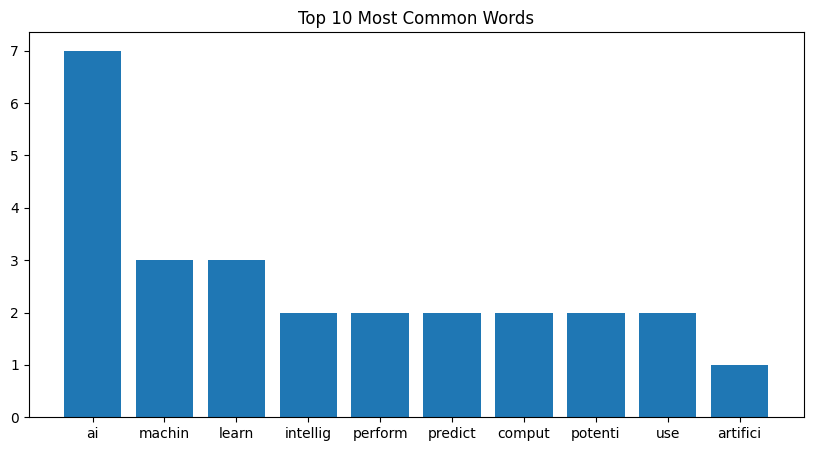

In [23]:
import matplotlib.pyplot as plt
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.show()

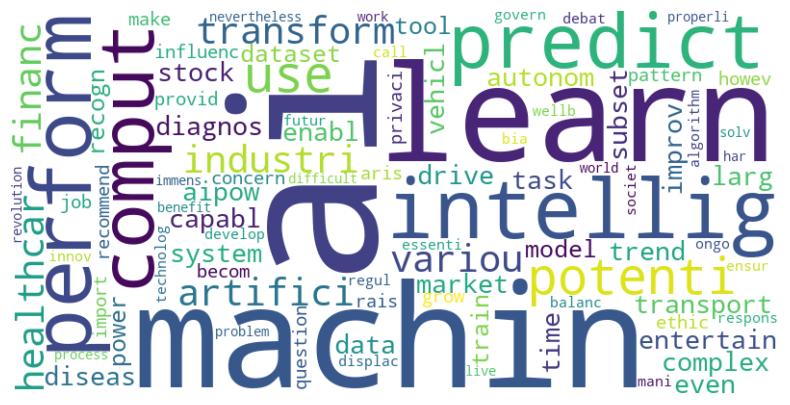

In [27]:
from wordcloud import WordCloud
stemmed_text = ' '.join(stemmed_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stemmed_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()